In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st

In [7]:
def std_sample_mean(s_population, n):
    """For a sample of size n, calculate the standard deviation of the sample mean,
    given the standard deviation of the population.
    """
    return s_population / np.sqrt(n)


def ci(mean, std, confidence):
    '''Calculate the confidence interval for the specified normal distribution of N(mean, std)
    at given confidence.
    '''
    std_error = st.norm.ppf(confidence)
    return mean - std_error * std, mean + std_error * std


## `scipy.stats.t`

```
Docstring:      
A Student's t continuous random variable.

As an instance of the `rv_continuous` class, `t` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.
```

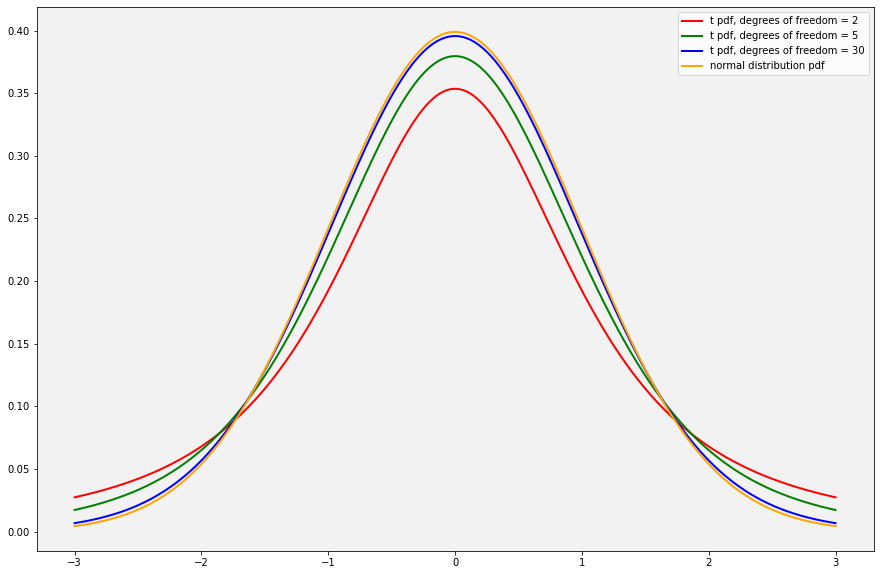

In [13]:
fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('0.95')  # set background color to light grey

x = np.linspace(-3, 3, 500)

df = 2
ax.plot(x, st.t.pdf(x, df), 'r', lw=2, label='t pdf, degrees of freedom = {}'.format(df))

df = 5
ax.plot(x, st.t.pdf(x, df), 'g', lw=2, label='t pdf, degrees of freedom = {}'.format(df))

df = 30
ax.plot(x, st.t.pdf(x, df), 'b', lw=2, label='t pdf, degrees of freedom = {}'.format(df))

ax.plot(x, st.norm.pdf(x), 'orange', lw=2, label='normal distribution pdf')

plt.legend()
plt.show()

In [14]:
df = 9
st.t.ppf(.9, df)

1.3830287383964925

In [15]:
df = 12
st.t.ppf(.95, df)

1.782287555649159

In [16]:
df = 29
st.t.ppf(.975, df)

2.045229642132703

In [17]:
df = 23
1 - st.t.cdf(2.45, df)

0.011157864080474367

In [18]:
filename = "../data/Finches.csv"
finches = pd.read_csv(filename)

finches.describe()

,Beak widths of finches now
count,500.000000
mean,6.469600
std,0.396118
min,5.300000
25%,6.200000
50%,6.500000
75%,6.700000
max,7.600000


In [19]:
n = 500
df = 499

p_mean = 6.07
s_mean = 6.47

p_std = 0.40
s_std = p_std / np.sqrt(n)


In [20]:
z = (s_mean - p_mean) / s_std

print(z)

22.360679774997866


In [21]:
sample = pd.Series([5, 19, 11, 23, 12, 7, 3, 21])

n = sample.count()
df = n - 1
s_mean = sample.mean()
s_mean_std = sample.std() / np.sqrt(n)

In [22]:
z = (s_mean - 10) / s_mean_std

print(z)

0.977461894333816


In [23]:
p = (1 - st.t.cdf(z, df)) * 2
print(p)

0.36090407456663254


In [26]:
n = 25
df = n - 1

p_mean = 1830
s_mean = 1700

s_std = 200
s_mean_std = s_std / np.sqrt(n)

In [27]:
z = (s_mean - p_mean) / s_mean_std

print(z)

-3.25


In [29]:
cohen_d = (s_mean - p_mean) / s_std

print(cohen_d)

-0.65


In [31]:
st.t.ppf(.975, 24)

2.0638985616280205

In [32]:
def ci_t(mean, std, df, confidence):
    '''Calculate the confidence interval for the specified t distribution of N(mean, std)
    at given two-sided confidence level.
    '''
    two_sided_confidence = confidence + (1 - confidence) / 2
    std_error = st.t.ppf(two_sided_confidence, df)
    return mean - std_error * std, mean + std_error * std

In [34]:
ci_t(s_mean, s_mean_std, df, .95)

(1617.4440575348792, 1782.5559424651208)

In [35]:
n = 100
df = n - 1

p_mean = 1830
s_mean = 1700

s_std = 200
s_mean_std = s_std / np.sqrt(n)

In [36]:
ci_t(s_mean, s_mean_std, df, .95)

(1660.3156609698262, 1739.6843390301738)

In [38]:
filename = "../data/Keyboards.csv"
keyboards = pd.read_csv(filename)

keyboards.head()

,QWERTY errors,Alphabetical errors
0,6,6
1,6,11
2,2,8
3,7,5
4,8,11


In [56]:
m_q = keyboards['QWERTY errors'].mean()
m_a = keyboards['Alphabetical errors'].mean()
m_diff = m_q - m_a

n = keyboards['QWERTY errors'].count()
df = n - 1

print(m_diff)

-2.7199999999999998


In [57]:
std_diff = (keyboards['QWERTY errors'] - keyboards['Alphabetical errors']).std()

print(std_diff)

3.6914315199752337


In [62]:
std_mean_diff = std_diff / np.sqrt(n)
print(std_mean_diff)

0.7382863039950467


In [59]:
z = m_diff / std_mean_diff

print(z)

-3.6842075835369266


In [61]:
ci_t(m_diff, std_mean_diff, df, .95)

(-4.243748040885044, -1.1962519591149554)

In [64]:
st.t.ppf(.95, 999)

1.646380345427535

In [65]:
np.sqrt(1.2**2 + 2.7**2)

2.9546573405388314

In [68]:
9 / (2.954 / np.sqrt(1000))

96.3456294567211